In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

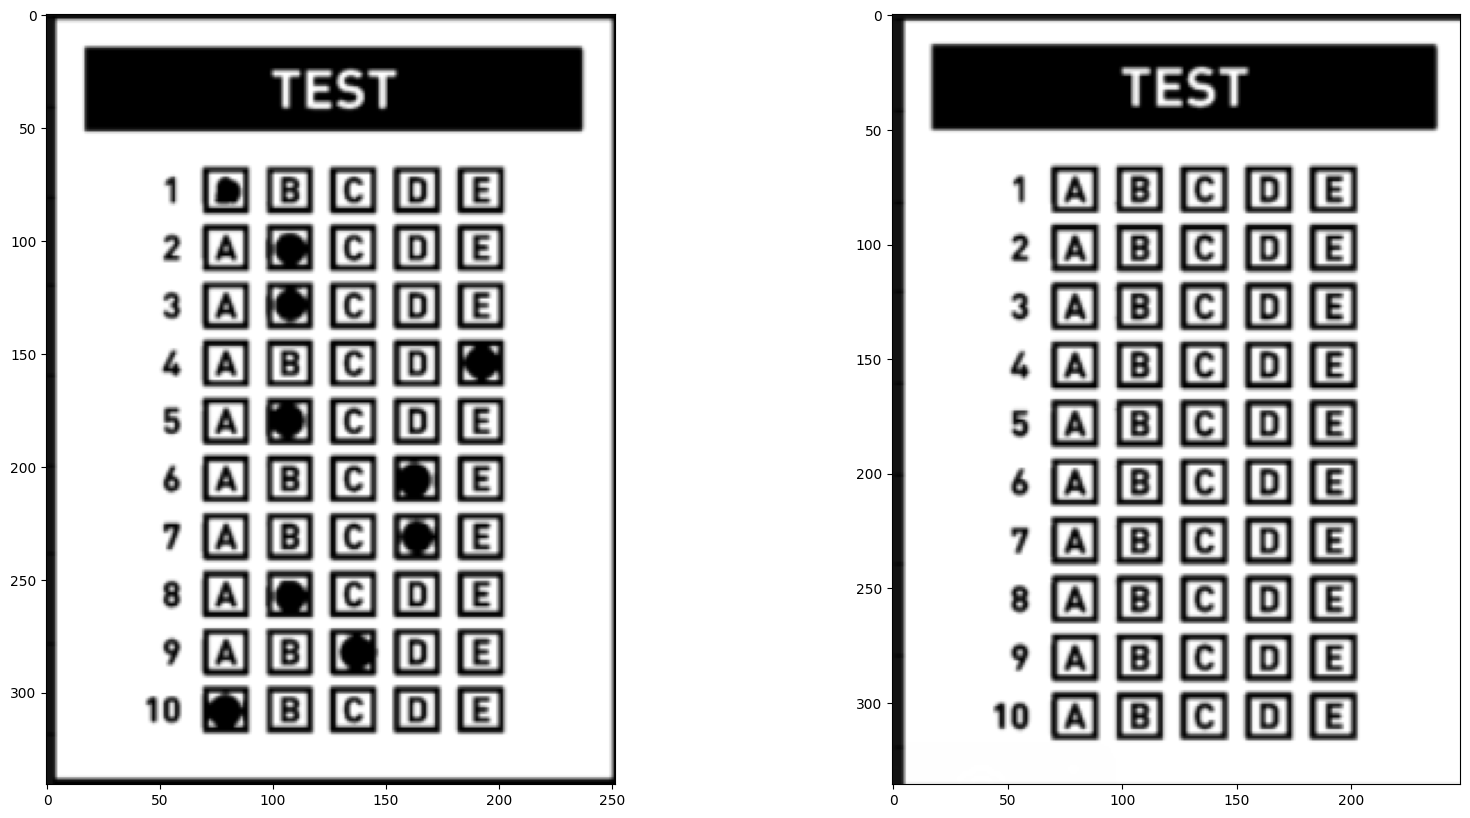

In [4]:
javob = cv2.imread('rasm/TEST1.png')
javob_gr = cv2.cvtColor(javob,cv2.COLOR_BGR2GRAY)
javob = cv2.cvtColor(javob,cv2.COLOR_BGR2RGB)

savol = cv2.imread('rasm/TEST.png')
savol_gr = cv2.cvtColor(savol,cv2.COLOR_BGR2GRAY)
savol = cv2.cvtColor(savol,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(javob_gr,cmap='gray')
plt.subplot(122)
plt.imshow(savol_gr,cmap='gray')

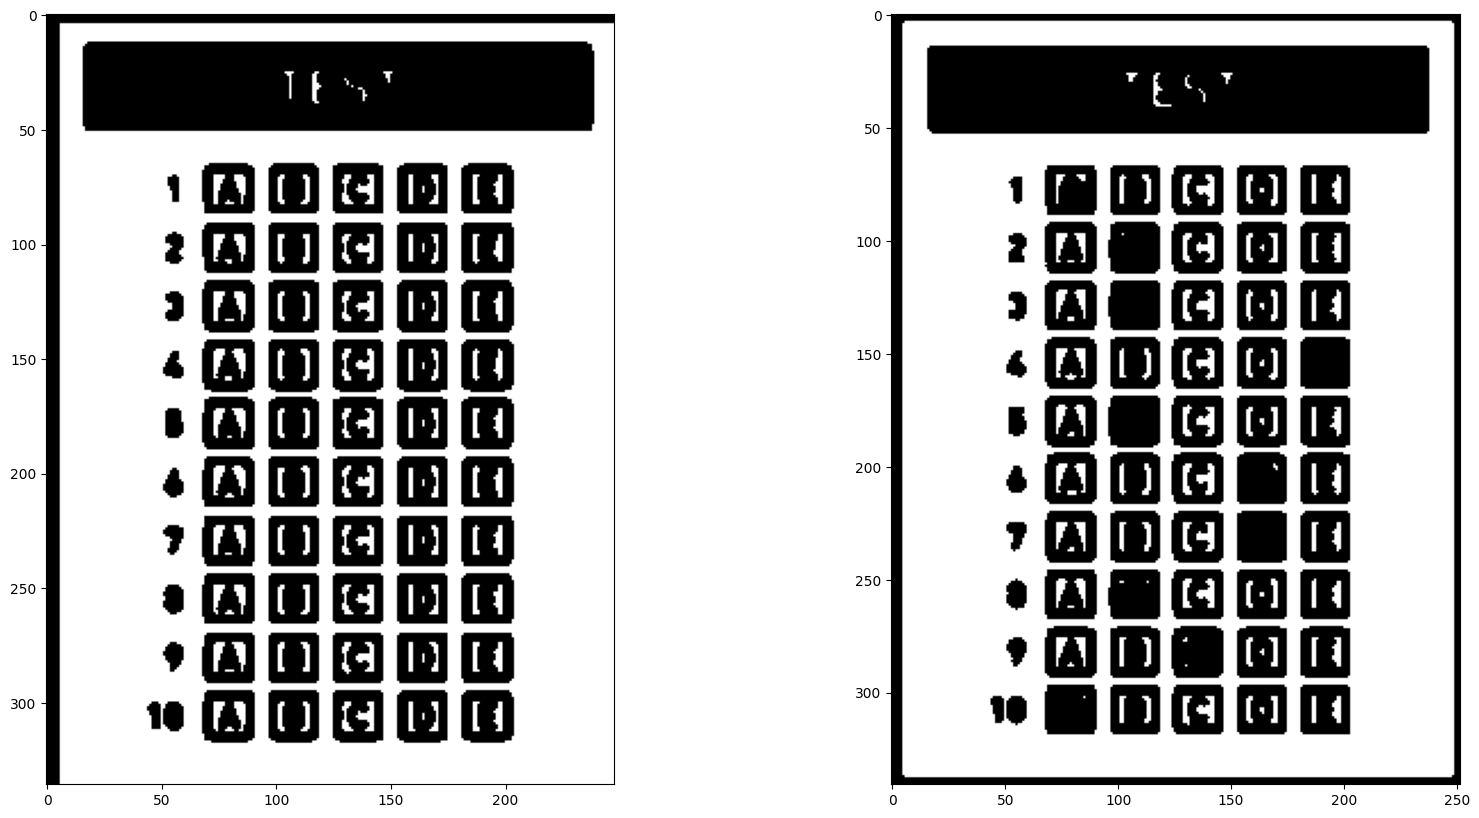

In [5]:
bulur_sv = cv2.GaussianBlur(savol_gr,(7,7),1)
bulur_jv = cv2.GaussianBlur(javob_gr,(7,7),1)

_,binary_sv = cv2.threshold(bulur_sv,200,255,cv2.THRESH_BINARY)
_,binary_jv = cv2.threshold(bulur_jv,200,255,cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(binary_sv,cmap='gray')
plt.subplot(122)
plt.imshow(binary_jv,cmap='gray')

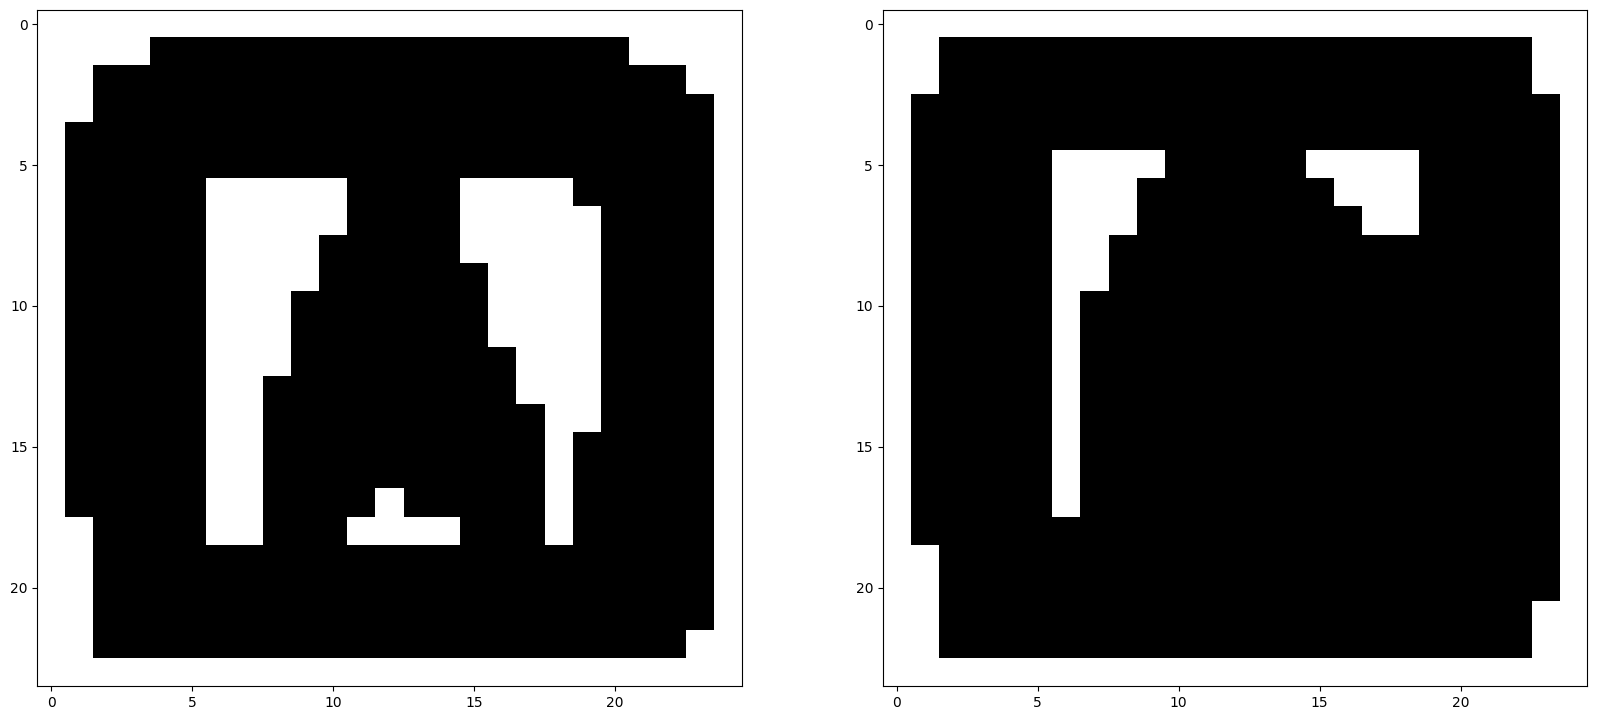

In [9]:
def getKataklar(binary):
    contours, hierarachy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    kataklar = []
    for i in range(len(contours)-1,0,-1):
        area = cv2.contourArea(contours[i])
        if area > 500 and area < 3000:
            x,y,w,h =cv2.boundingRect(contours[i])
            katak = binary[y:y+h,x:x+w]
            kataklar.append(katak)
    return kataklar

sv_list = getKataklar(binary_sv)
jv_list = getKataklar(binary_jv)

k = 0
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(sv_list[k],cmap='gray')
plt.subplot(122)
plt.imshow(jv_list[k],cmap='gray')

In [ ]:
true_answer = np.array(['A','A','A','A','A','A','A','A','A','A'])
my_answers = []
for k in range(50):
    nisbat1 = (sv_list[k].sum())/(sv_list[k].shape[0] * sv_list[k].shape[0])
    nisbat2 = (sv_list[k].sum())/(sv_list[k].shape[1] * sv_list[k].shape[1])
    farq = int(nisbat1) - int(nisbat2)

    if farq is not None:
        if farq > 5:
            if k%5==0:
                my_answers.append('A')
            elif k%5==1:
                my_answers.append('B')
            elif k%5==2:
                my_answers.append('C')
            elif k%5==3:
                my_answers.append('D')
            elif k%5==4:
                my_answers.append('E')

In [ ]:
print(my_answers)
print(true_answer)
tekshir = np.char.equal(true_answer,my_answers)
soni = np.count_nonzero(tekshir)
foiz = 10*soni

print(f"10 ta savoldan {soni} tasi topildi.")
print(f"Umumiy savollarning  {foiz}% ga javob topildi.")

['A', 'E', 'A', 'A', 'E', 'A', 'A', 'E', 'A', 'E']
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
10 ta savoldan 6 tasi topildi.
Umumiy savollarning  60% ga javob topildi.
